In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
import os
%matplotlib inline

In [22]:
def read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE):
    
    files = [os.path.join(DIR_INPUT, f) for f in os.listdir(DIR_INPUT) if f>=BEGIN_DATE+'.pkl' and f<=END_DATE+'.pkl']

    frames = []
    for f in files:
        df = pd.read_pickle(f)
        frames.append(df)
        del df
    df_final = pd.concat(frames)
    
    df_final=df_final.sort_values('TRANSACTION_ID')
    df_final.reset_index(drop=True,inplace=True)
    #  Note: -1 are missing values for real world data 
    df_final=df_final.replace([-1],0)
    
    return df_final

In [26]:
DIR_INPUT='./Training_Batch_Files/' 

BEGIN_DATE = "2018-04-01"
END_DATE = "2018-09-30"

print("Load  files")
transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files
1754155 transactions loaded, containing 14681 fraudulent transactions


In [27]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [28]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        int64         
 3   TERMINAL_ID        int64         
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    int64         
 6   TX_TIME_DAYS       int64         
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 120.4 MB


In [30]:
transactions_df.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,2.504011e+03,4.996733e+03,5.363230e+01,7.903234e+06,9.097260e+01,8.369272e-03,1.882388e-02
std,5.063811e+05,1.445987e+03,2.886101e+03,4.232649e+01,4.565172e+06,5.283709e+01,9.110012e-02,2.113263e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,1.252000e+03,2.502000e+03,2.101000e+01,3.940846e+06,4.500000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,2.506000e+03,4.994000e+03,4.464000e+01,7.902670e+06,9.100000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,3.765000e+03,7.495000e+03,7.695000e+01,1.186566e+07,1.370000e+02,0.000000e+00,0.000000e+00
max,1.754154e+06,4.999000e+03,9.999000e+03,2.628000e+03,1.581120e+07,1.820000e+02,1.000000e+00,3.000000e+00


In [10]:
df.isnull().sum()

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [31]:
from pandas_profiling import ProfileReport
pf=ProfileReport(transactions_df)
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
def is_weekend(tx_datetime):
    
    # Transform date into weekday (0 is Monday, 6 is Sunday)
    weekday = tx_datetime.weekday()
    # Binary value: 0 if weekday, 1 if weekend
    is_weekend = weekday>=5
    
    return int(is_weekend)


In [33]:
%time transactions_df['TX_DURING_WEEKEND']=transactions_df.TX_DATETIME.apply(is_weekend)

Wall time: 26.4 s


In [34]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1


In [35]:
def is_night(tx_datetime):
    
    # Get the hour of the transaction
    tx_hour = tx_datetime.hour
    # Binary value: 1 if hour less than 6, and 0 otherwise
    is_night = tx_hour<=6
    
    return int(is_night)

In [36]:
%time transactions_df['TX_DURING_NIGHT']=transactions_df.TX_DATETIME.apply(is_night)

Wall time: 24 s


In [37]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1


In [80]:
def get_customer_spending_behaviour_features(customer_transactions, windows_size_in_days=[1,7,30]):
   # Let us first order transactions chronologically
    customer_transactions=customer_transactions.sort_values('TX_DATETIME')
    
    # The transaction date and time is set as the index, which will allow the use of the rolling function 
    customer_transactions.index=customer_transactions.TX_DATETIME
    
    # For each window size
    for window_size in windows_size_in_days:
        
        # Compute the sum of the transaction amounts and the number of transactions for the given window size
        SUM_AMOUNT_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').sum()
        NB_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').count()
    
        # Compute the average transaction amount for the given window size
        # NB_TX_WINDOW is always >0 since current transaction is always included
        AVG_AMOUNT_TX_WINDOW=SUM_AMOUNT_TX_WINDOW/NB_TX_WINDOW
    
        # Save feature values
        customer_transactions['CUSTOMER_ID_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        customer_transactions['CUSTOMER_ID_AVG_AMOUNT_'+str(window_size)+'DAY_WINDOW']=list(AVG_AMOUNT_TX_WINDOW)
    
    # Reindex according to transaction IDs
    customer_transactions.index=customer_transactions.TRANSACTION_ID
        
    # And return the dataframe with the new features
    return customer_transactions


In [81]:
%time transactions_df=transactions_df.groupby('CUSTOMER_ID').apply(lambda x: get_customer_spending_behaviour_features(x, windows_size_in_days=[1,7,30]))
transactions_df=transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)


Wall time: 20.6 s


In [82]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1,1.0,57.16,1.0,57.16,1.0,57.16
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1,1.0,81.51,1.0,81.51,1.0,81.51
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1,1.0,146.00,1.0,146.00,1.0,146.00
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1,1.0,64.49,1.0,64.49,1.0,64.49
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1,1.0,50.99,1.0,50.99,1.0,50.99


In [83]:
def get_count_risk_rolling_window(terminal_transactions, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"):
    
    terminal_transactions=terminal_transactions.sort_values('TX_DATETIME')
    
    terminal_transactions.index=terminal_transactions.TX_DATETIME
    
    NB_FRAUD_DELAY=terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').sum()
    NB_TX_DELAY=terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').count()
    
    for window_size in windows_size_in_days:
    
        NB_FRAUD_DELAY_WINDOW=terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').sum()
        NB_TX_DELAY_WINDOW=terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').count()
    
        NB_FRAUD_WINDOW=NB_FRAUD_DELAY_WINDOW-NB_FRAUD_DELAY
        NB_TX_WINDOW=NB_TX_DELAY_WINDOW-NB_TX_DELAY
    
        RISK_WINDOW=NB_FRAUD_WINDOW/NB_TX_WINDOW
        
        terminal_transactions[feature+'_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        terminal_transactions[feature+'_RISK_'+str(window_size)+'DAY_WINDOW']=list(RISK_WINDOW)
        
    terminal_transactions.index=terminal_transactions.TRANSACTION_ID
    
    # Replace NA values with 0 (all undefined risk scores where NB_TX_WINDOW is 0) 
    terminal_transactions.fillna(0,inplace=True)
    
    return terminal_transactions


In [85]:
%time transactions_df=transactions_df.groupby('TERMINAL_ID').apply(lambda x: get_count_risk_rolling_window(x, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"))
transactions_df=transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)


Wall time: 1min 41s


In [88]:
import datetime
DIR_OUTPUT = "./simulated-data-transformed/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):
    
    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')
    
    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'
    
    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)

In [90]:
# Load data from the 2018-07-25 to the 2018-08-14

DIR_INPUT='./simulated-data-transformed/' 

BEGIN_DATE = "2018-07-25"
END_DATE = "2018-08-14"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files
Wall time: 685 ms
201295 transactions loaded, containing 1792 fraudulent transactions


In [91]:
# Compute the number of transactions per day, fraudulent transactions per day and fraudulent cards per day

def get_tx_stats(transactions_df, start_date_df="2018-04-01"):
    
    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraudulent_transactions_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #Number of compromised cards per day
    nb_compromised_cards_per_day=transactions_df[transactions_df['TX_FRAUD']==1].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()
    
    tx_stats=pd.DataFrame({"nb_tx_per_day":nb_tx_per_day,
                           "nb_fraudulent_transactions_per_day":nb_fraudulent_transactions_per_day,
                           "nb_compromised_cards_per_day":nb_compromised_cards_per_day})

    tx_stats=tx_stats.reset_index()
    
    start_date = datetime.datetime.strptime(start_date_df, "%Y-%m-%d")
    tx_date=start_date+tx_stats['TX_TIME_DAYS'].apply(datetime.timedelta)
    
    tx_stats['tx_date']=tx_date
    
    return tx_stats

tx_stats=get_tx_stats(transactions_df, start_date_df="2018-04-01")

In [92]:
%%capture

# Plot the number of transactions per day, fraudulent transactions per day and fraudulent cards per day

def get_template_tx_stats(ax ,fs,
                          start_date_training,
                          title='',
                          delta_train=7,
                          delta_delay=7,
                          delta_test=7,
                          ylim=300):
    
    ax.set_title(title, fontsize=fs*1.5)
    ax.set_ylim([0, ylim])
    
    ax.set_xlabel('Date', fontsize=fs)
    ax.set_ylabel('Number', fontsize=fs)
    
    plt.yticks(fontsize=fs*0.7) 
    plt.xticks(fontsize=fs*0.7)    

    ax.axvline(start_date_training+datetime.timedelta(days=delta_train), 0,ylim, color="black")
    ax.axvline(start_date_test, 0, ylim, color="black")
    
    ax.text(start_date_training+datetime.timedelta(days=2), ylim-20,'Training period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+2), ylim-20,'Delay period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+delta_delay+2), ylim-20,'Test period', fontsize=fs)


cmap = plt.get_cmap('jet')
colors={'nb_tx_per_day':cmap(0), 
        'nb_fraudulent_transactions_per_day':cmap(200), 
        'nb_compromised_cards_per_day':cmap(250)}

fraud_and_transactions_stats_fig, ax = plt.subplots(1, 1, figsize=(15,8))

# Training period
start_date_training = datetime.datetime.strptime("2018-07-25", "%Y-%m-%d")
delta_train = delta_delay = delta_test = 7

end_date_training = start_date_training+datetime.timedelta(days=delta_train-1)

# Test period
start_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay)
end_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay+delta_test-1)

get_template_tx_stats(ax, fs=20,
                      start_date_training=start_date_training,
                      title='Total transactions, and number of fraudulent transactions \n and number of compromised cards per day',
                      delta_train=delta_train,
                      delta_delay=delta_delay,
                      delta_test=delta_test
                     )

ax.plot(tx_stats['tx_date'], tx_stats['nb_tx_per_day']/50, 'b', color=colors['nb_tx_per_day'], label = '# transactions per day (/50)')
ax.plot(tx_stats['tx_date'], tx_stats['nb_fraudulent_transactions_per_day'], 'b', color=colors['nb_fraudulent_transactions_per_day'], label = '# fraudulent txs per day')
ax.plot(tx_stats['tx_date'], tx_stats['nb_compromised_cards_per_day'], 'b', color=colors['nb_compromised_cards_per_day'], label = '# compromised cards per day')

ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1),fontsize=20)

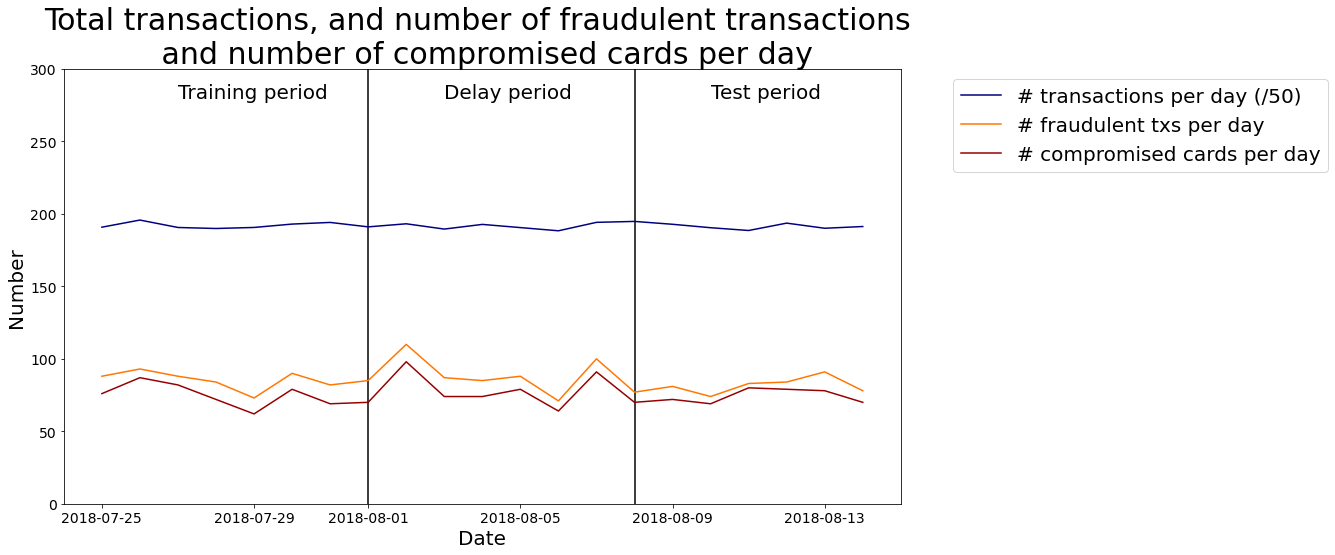

In [93]:
fraud_and_transactions_stats_fig

In [95]:
def get_train_test_set(transactions_df,
                       start_date_training,
                       delta_train=7,delta_delay=7,delta_test=7):
    
    # Get the training set data
    train_df = transactions_df[(transactions_df.TX_DATETIME>=start_date_training) &
                               (transactions_df.TX_DATETIME<start_date_training+datetime.timedelta(days=delta_train))]
    
    # Get the test set data
    test_df = []
    
    # Note: Cards known to be compromised after the delay period are removed from the test set
    # That is, for each test day, all frauds known at (test_day-delay_period) are removed
    
    # First, get known defrauded customers from the training set
    known_defrauded_customers = set(train_df[train_df.TX_FRAUD==1].CUSTOMER_ID)
    
    # Get the relative starting day of training set (easier than TX_DATETIME to collect test data)
    start_tx_time_days_training = train_df.TX_TIME_DAYS.min()
    
    # Then, for each day of the test set
    for day in range(delta_test):
    
        # Get test data for that day
        test_df_day = transactions_df[transactions_df.TX_TIME_DAYS==start_tx_time_days_training+
                                                                    delta_train+delta_delay+
                                                                    day]
        
        # Compromised cards from that test day, minus the delay period, are added to the pool of known defrauded customers
        test_df_day_delay_period = transactions_df[transactions_df.TX_TIME_DAYS==start_tx_time_days_training+
                                                                                delta_train+
                                                                                day-1]
        
        new_defrauded_customers = set(test_df_day_delay_period[test_df_day_delay_period.TX_FRAUD==1].CUSTOMER_ID)
        known_defrauded_customers = known_defrauded_customers.union(new_defrauded_customers)
        
        test_df_day = test_df_day[~test_df_day.CUSTOMER_ID.isin(known_defrauded_customers)]
        
        test_df.append(test_df_day)
        
    test_df = pd.concat(test_df)
    
    # Sort data sets by ascending order of transaction ID
    train_df=train_df.sort_values('TRANSACTION_ID')
    test_df=test_df.sort_values('TRANSACTION_ID')
    
    return (train_df, test_df)

In [96]:
(train_df, test_df)=get_train_test_set(transactions_df,start_date_training,
                                       delta_train=7,delta_delay=7,delta_test=7)

In [97]:
train_df.shape


(67240, 23)

In [98]:
output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW']

In [126]:
import time
def fit_model_and_get_predictions(classifier, train_df, test_df, 
                                  input_features, output_feature="TX_FRAUD",scale=True):

    # By default, scales input data
    if scale:
        (train_df, test_df)=scaleData(train_df,test_df,input_features)
    
    # We first train the classifier using the `fit` method, and pass as arguments the input and output features
    start_time=time.time()
    classifier.fit(train_df[input_features], train_df[output_feature])
    training_execution_time=time.time()-start_time

    # We then get the predictions on the training and test data using the `predict_proba` method
    # The predictions are returned as a numpy array, that provides the probability of fraud for each transaction 
    start_time=time.time()
    predictions_test=classifier.predict_proba(test_df[input_features])[:,1]
    prediction_execution_time=time.time()-start_time
    
    predictions_train=classifier.predict_proba(train_df[input_features])[:,1]

    # The result is returned as a dictionary containing the fitted models, 
    # and the predictions on the training and test sets
    model_and_predictions_dictionary = {'classifier': classifier,
                                        'predictions_test': predictions_test,
                                        'predictions_train': predictions_train,
                                        'training_execution_time': training_execution_time,
                                        'prediction_execution_time': prediction_execution_time
                                      }
    return model_and_predictions_dictionary
    

In [127]:
# We first create a decision tree object. We will limit its depth to 2 for interpretability, 
# and set the random state to zero for reproducibility
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2, random_state=0)

model_and_predictions_dictionary = fit_model_and_get_predictions(classifier, train_df, test_df, 
                                                                 input_features, output_feature,
                                                                 scale=False)

In [139]:
pred=classifier.predict(train_df[input_features])
AUC_ROC =roc_auc_score(train_df[output_feature], pred)
print(AUC_ROC)


0.7917084839785371


In [128]:
print(model_and_predictions_dictionary)

{'classifier': DecisionTreeClassifier(max_depth=2, random_state=0), 'predictions_test': array([0.00353643, 0.00353643, 0.00353643, ..., 0.00353643, 0.00353643,
       0.00353643]), 'predictions_train': array([0.00353643, 0.00353643, 0.00353643, ..., 0.00353643, 0.00353643,
       0.00353643]), 'training_execution_time': 0.11809611320495605, 'prediction_execution_time': 0.011112689971923828}


In [129]:
test_df['TX_FRAUD_PREDICTED']=model_and_predictions_dictionary['predictions_test']
test_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_FRAUD_PREDICTED
134215,1236698,2018-08-08 00:01:14,2765,2747,42.32,11145674,129,0,0,0,...,67.468529,120.0,64.611750,2.0,0.0,9.0,0.0,31.0,0.000000,0.003536
134216,1236699,2018-08-08 00:02:33,714,2073,108.19,11145753,129,0,0,0,...,79.955455,124.0,85.365645,2.0,0.0,10.0,0.0,23.0,0.000000,0.003536
134218,1236701,2018-08-08 00:08:40,4982,1258,26.13,11146120,129,0,0,0,...,56.269167,61.0,49.095902,1.0,0.0,10.0,0.0,26.0,0.076923,0.003536
134219,1236702,2018-08-08 00:08:41,704,8501,65.81,11146121,129,0,0,0,...,62.643333,11.0,63.287273,1.0,0.0,6.0,0.0,23.0,0.000000,0.003536
134220,1236703,2018-08-08 00:10:34,3085,4208,55.22,11146234,129,0,0,0,...,71.993846,72.0,59.899306,1.0,0.0,5.0,0.0,21.0,0.523810,0.003536


In [135]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
def card_precision_top_k_day(df_day,top_k):
    
    # This takes the max of the predictions AND the max of label TX_FRAUD for each CUSTOMER_ID, 
    # and sorts by decreasing order of fraudulent prediction
    df_day = df_day.groupby('CUSTOMER_ID').max().sort_values(by="predictions", ascending=False).reset_index(drop=False)
            
    # Get the top k most suspicious cards
    df_day_top_k=df_day.head(top_k)
    list_detected_compromised_cards=list(df_day_top_k[df_day_top_k.TX_FRAUD==1].CUSTOMER_ID)
    
    # Compute precision top k
    card_precision_top_k = len(list_detected_compromised_cards) / top_k
    
    return list_detected_compromised_cards, card_precision_top_k

def card_precision_top_k(predictions_df, top_k, remove_detected_compromised_cards=True):

    # Sort days by increasing order
    list_days=list(predictions_df['TX_TIME_DAYS'].unique())
    list_days.sort()
    
    # At first, the list of detected compromised cards is empty
    list_detected_compromised_cards = []
    
    card_precision_top_k_per_day_list = []
    nb_compromised_cards_per_day = []
    
    # For each day, compute precision top k
    for day in list_days:
        
        df_day = predictions_df[predictions_df['TX_TIME_DAYS']==day]
        df_day = df_day[['predictions', 'CUSTOMER_ID', 'TX_FRAUD']]
        
        # Let us remove detected compromised cards from the set of daily transactions
        df_day = df_day[df_day.CUSTOMER_ID.isin(list_detected_compromised_cards)==False]
        
        nb_compromised_cards_per_day.append(len(df_day[df_day.TX_FRAUD==1].CUSTOMER_ID.unique()))
        
        detected_compromised_cards, card_precision_top_k = card_precision_top_k_day(df_day,top_k)
        
        card_precision_top_k_per_day_list.append(card_precision_top_k)
        
        # Let us update the list of detected compromised cards
        if remove_detected_compromised_cards:
            list_detected_compromised_cards.extend(detected_compromised_cards)
        
    # Compute the mean
    mean_card_precision_top_k = np.array(card_precision_top_k_per_day_list).mean()
    
    # Returns precision top k per day as a list, and resulting mean
    return nb_compromised_cards_per_day,card_precision_top_k_per_day_list,mean_card_precision_top_k

def performance_assessment(predictions_df, output_feature='TX_FRAUD', 
                           prediction_feature='predictions', top_k_list=[100],
                           rounded=True):
    
    AUC_ROC =roc_auc_score(predictions_df[output_feature], predictions_df[prediction_feature])
    AP = average_precision_score(predictions_df[output_feature], predictions_df[prediction_feature])
    
    performances = pd.DataFrame([[AUC_ROC, AP]], 
                           columns=['AUC ROC','Average precision'])
    
    for top_k in top_k_list:
    
        _, _, mean_card_precision_top_k = card_precision_top_k(predictions_df, top_k)
        performances['Card Precision@'+str(top_k)]=mean_card_precision_top_k
        
    if rounded:
        performances = performances.round(3)
    
    return performances

In [136]:
predictions_df=test_df
predictions_df['predictions']=model_and_predictions_dictionary['predictions_test']
    
performance_assessment(predictions_df, top_k_list=[100])

,AUC ROC,Average precision,Card Precision@100
0,0.763,0.496,0.241


In [140]:
import numpy as np
my_array = np.arange(6).reshape(2,3)
result = np.trace(my_array)
print(result)

4


In [142]:
import numpy as np
from numpy import linalg
a = np.array([[1, 0], [1, 2]])
print(type(np.linalg.det(a)))

<class 'numpy.float64'>


In [143]:



import numpy as np
p = [[1, 0], [0, 1]]
q = [[1, 2], [3, 4]]
result1 = np.cross(p, q)
result2 = np.cross(q, p)
print((result1==result2).shape[0])

2


In [163]:
foldpath=r"C:\Users\singh-93\Desktop\09.23.2021 - Copy\jfjhsdkjf "
len(foldpath)

54

In [166]:
t=[10,4,5]
t.pop(2)
t

[10, 4]

In [167]:
a=-3
a=-a
a

3

In [169]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 66e3805b8cabe977f40c05259cc3fcf7ead5687d
python           : 3.8.8.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 1.3.5
numpy            : 1.19.2
pytz             : 2021.1
dateutil         : 2.8.1
pip              : 21.0.1
setuptools       : 52.0.0.post20210125
Cython           : 0.29.23
pytest           : 6.2.3
hypothesis       : None
sphinx           : 4.0.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.8
lxml.etree       : 4.6.3
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.22.0
pandas_datareader: 0.10.0
bs4              : 4.9.3
bottlenec

In [194]:
data=pd.read_excel(r"\\in14sf02\business process automation\Invoice Duplication\Output\250422050112\GBSI.xlsx")

In [174]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,Amount,Text,User Name,Clearing Document,Clearing date,Year/month,Document Type,Source,Abs_Amount,Logic
0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,...,-33.00,"0000002187, Sprachschule BLSS Kristina Straub",WF-BATCH,NaN,NaT,2022/02,NaN,Old Invoices,33.00,"Logic 3 - Date, Amount"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-33.00,"0000002181, Sprachschule BLSS Kristina Straub",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,33.00,"Logic 3 - Date, Amount"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-90.44,"0000002090, Hessische Eichdirektion",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,90.44,"Logic 3 - Date, Amount"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-90.44,"0000002090, Hessische Eichdirektion",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,90.44,"Logic 3 - Date, Amount"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-122.80,"0000002185, Swissphone Wireless AG",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,122.80,"Logic 3 - Date, Amount"


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    15 non-null     float64       
 1   Unnamed: 0.1                  4 non-null      float64       
 2   Unnamed: 0.1.1                4 non-null      float64       
 3   Unnamed: 0.1.1.1              3 non-null      float64       
 4   Unnamed: 0.1.1.1.1            3 non-null      float64       
 5   Unnamed: 0.1.1.1.1.1          3 non-null      float64       
 6   Unnamed: 0.1.1.1.1.1.1        3 non-null      float64       
 7   Unnamed: 0.1.1.1.1.1.1.1      3 non-null      float64       
 8   Unnamed: 0.1.1.1.1.1.1.1.1    3 non-null      float64       
 9   Unnamed: 0.1.1.1.1.1.1.1.1.1  3 non-null      float64       
 10  Company Code                  127 non-null    object        
 11  Account                       12

In [176]:
data['Doc_type']=data['Document type']+data['Document type']

In [177]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,Text,User Name,Clearing Document,Clearing date,Year/month,Document Type,Source,Abs_Amount,Logic,Doc_type
0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,...,"0000002187, Sprachschule BLSS Kristina Straub",WF-BATCH,NaN,NaT,2022/02,NaN,Old Invoices,33.00,"Logic 3 - Date, Amount",KRKR
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0000002181, Sprachschule BLSS Kristina Straub",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,33.00,"Logic 3 - Date, Amount",NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0000002090, Hessische Eichdirektion",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,90.44,"Logic 3 - Date, Amount",NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0000002090, Hessische Eichdirektion",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,90.44,"Logic 3 - Date, Amount",NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0000002185, Swissphone Wireless AG",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,122.80,"Logic 3 - Date, Amount",NaN


In [179]:
data=data.drop(['Doc_type'],axis=1)

In [188]:
data['Doc_Type'] = data[['Document Type','Document type']].agg(''.join, axis=1)

TypeError: sequence item 0: expected str instance, float found

In [195]:
data['Document Type']=data['Document Type'].fillna("")

In [197]:
data.isnull().sum()

Unnamed: 0                      112
Unnamed: 0.1                    123
Unnamed: 0.1.1                  123
Unnamed: 0.1.1.1                124
Unnamed: 0.1.1.1.1              124
Unnamed: 0.1.1.1.1.1            124
Unnamed: 0.1.1.1.1.1.1          124
Unnamed: 0.1.1.1.1.1.1.1        124
Unnamed: 0.1.1.1.1.1.1.1.1      124
Unnamed: 0.1.1.1.1.1.1.1.1.1    124
Company Code                      0
Account                           0
Document type                   124
Reference                         0
Document Number                   0
Date                              0
Posting Date                      0
Entry Date                        0
Document currency                 0
Amount                            0
Text                             14
User Name                         0
Clearing Document               125
Clearing date                     0
Year/month                        0
Document Type                     0
Source                            0
Abs_Amount                  

In [198]:
data['Document type']=data['Document type'].fillna("")

In [199]:
data['Doc_Type']=data['Document Type']+data['Document type']

In [200]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,Text,User Name,Clearing Document,Clearing date,Year/month,Document Type,Source,Abs_Amount,Logic,Doc_Type
0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,818349.0,...,"0000002187, Sprachschule BLSS Kristina Straub",WF-BATCH,NaN,NaT,2022/02,,Old Invoices,33.00,"Logic 3 - Date, Amount",KR
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0000002181, Sprachschule BLSS Kristina Straub",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,33.00,"Logic 3 - Date, Amount",KR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0000002090, Hessische Eichdirektion",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,90.44,"Logic 3 - Date, Amount",KR
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0000002090, Hessische Eichdirektion",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,90.44,"Logic 3 - Date, Amount",KR
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0000002185, Swissphone Wireless AG",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,122.80,"Logic 3 - Date, Amount",KR


In [204]:
data['Doc_Type']

0      KR
1      KR
2      KR
3      KR
4      KR
       ..
122    RE
123    RE
124    RE
125    RE
126    RE
Name: Doc_Type, Length: 127, dtype: object

In [205]:
data=data.loc[:,'Company Code':]

In [206]:
data

,Company Code,Account,Document type,Reference,Document Number,Date,Posting Date,Entry Date,Document currency,Amount,Text,User Name,Clearing Document,Clearing date,Year/month,Document Type,Source,Abs_Amount,Logic,Doc_Type
0,CH36,200003998,KR,220153A,2000008941,2022-02-08,2022-02-15,2022-02-15,CHF,-33.00,"0000002187, Sprachschule BLSS Kristina Straub",WF-BATCH,NaN,NaT,2022/02,,Old Invoices,33.00,"Logic 3 - Date, Amount",KR
1,CH36,200003998,,220154A,2000023738,2022-02-08,2022-04-24,2022-04-24,CHF,-33.00,"0000002181, Sprachschule BLSS Kristina Straub",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,33.00,"Logic 3 - Date, Amount",KR
2,DE01,200031335,,2207OJ098,2000021030,2022-03-10,2022-04-21,2022-04-21,EUR,-90.44,"0000002090, Hessische Eichdirektion",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,90.44,"Logic 3 - Date, Amount",KR
3,DE01,200031335,,2207OJ099,2000021027,2022-03-10,2022-04-21,2022-04-21,EUR,-90.44,"0000002090, Hessische Eichdirektion",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,90.44,"Logic 3 - Date, Amount",KR
4,CH36,200011959,,549538,2000023404,2022-04-06,2022-04-21,2022-04-21,CHF,-122.80,"0000002185, Swissphone Wireless AG",WF-BATCH,NaN,NaT,2022/04,KR,New Invoices,122.80,"Logic 3 - Date, Amount",KR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,US15,200026211,,115956-20,2000005965,2022-04-20,2022-04-22,2022-04-22,USD,-1080.00,"NCIM, 4504842797",WF-BATCH,NaN,NaT,2022/04,RE,New Invoices,1080.00,"Logic 3 - Date, Amount",RE
123,US15,200026211,,115961-20,2000005940,2022-04-20,2022-04-22,2022-04-22,USD,-1040.00,"NCIM, 4504854414",WF-BATCH,NaN,NaT,2022/04,RE,New Invoices,1040.00,"Logic 3 - Date, Amount",RE
124,US15,200026211,,115962-20,2000006023,2022-04-20,2022-04-22,2022-04-22,USD,-1040.00,"NCIM, 4504813771",WF-BATCH,NaN,NaT,2022/04,RE,New Invoices,1040.00,"Logic 3 - Date, Amount",RE
125,US15,200026211,,115957-20,2000005970,2022-04-20,2022-04-22,2022-04-22,USD,-440.00,"NCIM, 4504842794",WF-BATCH,NaN,NaT,2022/04,RE,New Invoices,440.00,"Logic 3 - Date, Amount",RE


In [207]:
data=data.drop(['Document Type','Document type'],axis=1)

In [211]:
l1=list(data.columns)

In [212]:
l1

['Company Code',
 'Account',
 'Reference',
 'Document Number',
 'Date',
 'Posting Date',
 'Entry Date',
 'Document currency',
 'Amount',
 'Text',
 'User Name',
 'Clearing Document',
 'Clearing date',
 'Year/month',
 'Source',
 'Abs_Amount',
 'Logic',
 'Doc_Type']

In [217]:
l2=['Company Code',
 'Account',
 'Document Type',
 'Reference',
 'Document Number',
 'Date',
 'Posting Date',
 'Entry Date',
 'Document currency',
 'Amount',
 'Text',
 'User Name',
 'Clearing Document',
 'Clearing date',
 'Year/month',
 'Source',
 'Abs_Amount',
 'Logic']

In [218]:
data=data[l2]

In [219]:
data

,Company Code,Account,Doc_Type,Reference,Document Number,Date,Posting Date,Entry Date,Document currency,Amount,Text,User Name,Clearing Document,Clearing date,Year/month,Source,Abs_Amount,Logic
0,CH36,200003998,KR,220153A,2000008941,2022-02-08,2022-02-15,2022-02-15,CHF,-33.00,"0000002187, Sprachschule BLSS Kristina Straub",WF-BATCH,NaN,NaT,2022/02,Old Invoices,33.00,"Logic 3 - Date, Amount"
1,CH36,200003998,KR,220154A,2000023738,2022-02-08,2022-04-24,2022-04-24,CHF,-33.00,"0000002181, Sprachschule BLSS Kristina Straub",WF-BATCH,NaN,NaT,2022/04,New Invoices,33.00,"Logic 3 - Date, Amount"
2,DE01,200031335,KR,2207OJ098,2000021030,2022-03-10,2022-04-21,2022-04-21,EUR,-90.44,"0000002090, Hessische Eichdirektion",WF-BATCH,NaN,NaT,2022/04,New Invoices,90.44,"Logic 3 - Date, Amount"
3,DE01,200031335,KR,2207OJ099,2000021027,2022-03-10,2022-04-21,2022-04-21,EUR,-90.44,"0000002090, Hessische Eichdirektion",WF-BATCH,NaN,NaT,2022/04,New Invoices,90.44,"Logic 3 - Date, Amount"
4,CH36,200011959,KR,549538,2000023404,2022-04-06,2022-04-21,2022-04-21,CHF,-122.80,"0000002185, Swissphone Wireless AG",WF-BATCH,NaN,NaT,2022/04,New Invoices,122.80,"Logic 3 - Date, Amount"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,US15,200026211,RE,115956-20,2000005965,2022-04-20,2022-04-22,2022-04-22,USD,-1080.00,"NCIM, 4504842797",WF-BATCH,NaN,NaT,2022/04,New Invoices,1080.00,"Logic 3 - Date, Amount"
123,US15,200026211,RE,115961-20,2000005940,2022-04-20,2022-04-22,2022-04-22,USD,-1040.00,"NCIM, 4504854414",WF-BATCH,NaN,NaT,2022/04,New Invoices,1040.00,"Logic 3 - Date, Amount"
124,US15,200026211,RE,115962-20,2000006023,2022-04-20,2022-04-22,2022-04-22,USD,-1040.00,"NCIM, 4504813771",WF-BATCH,NaN,NaT,2022/04,New Invoices,1040.00,"Logic 3 - Date, Amount"
125,US15,200026211,RE,115957-20,2000005970,2022-04-20,2022-04-22,2022-04-22,USD,-440.00,"NCIM, 4504842794",WF-BATCH,NaN,NaT,2022/04,New Invoices,440.00,"Logic 3 - Date, Amount"
